# Loan Status Project

 ## Work Flow
 -> Data   ->Data Pre-Processing  ->Traing and Testing Splitting ->Model (SVM)
 -> Trained Model -> New Data -> Predict Loan Approved or Reject

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm                               #### the way to import Support vector machine (SVM)
from sklearn.metrics import accuracy_score


In [2]:
#### Data importing and Processing
#### Step-1

loan_data=pd.read_csv("train_data.csv")

In [3]:
#### Step-2

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#### Step-3
#### finding the null values

loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#### Step-4
#### filling the null values with ' ' empty space with using fillna() function

# loan_data=loan_data.fillna(' ')

## we are not using this technique in this set of code because there are some numerical columns, we converted into string column after getting the empty value in null value

# reather then using this technique we drop the null values
loan_data=loan_data.dropna()

In [6]:
#### Step-5
#### then checking the null values

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
type(loan_data)

pandas.core.frame.DataFrame

In [8]:
loan_data.shape

(480, 13)

In [9]:
loan_data.size

6240

In [10]:
loan_data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [11]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [12]:
loan_data.groupby('Loan_Status').mean()

C:\Users\Nishant Kumar\AppData\Local\Temp\ipykernel_47192\627208532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916


## label encoding
- replacing N and Y with 0 and 1 for convenience purpose
- in sklearn there is a function for doing this or we are done with the help of code


In [13]:
loan_data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [14]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
#### replacing the 3+ value to 4 for convenience 
loan_data=loan_data.replace(to_replace="3+", value=4)

In [17]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [44]:
loan_data['Property_Area'].value_counts()

2    191
0    150
1    139
Name: Property_Area, dtype: int64

## Now visualize the Data

<AxesSubplot: xlabel='Education', ylabel='count'>

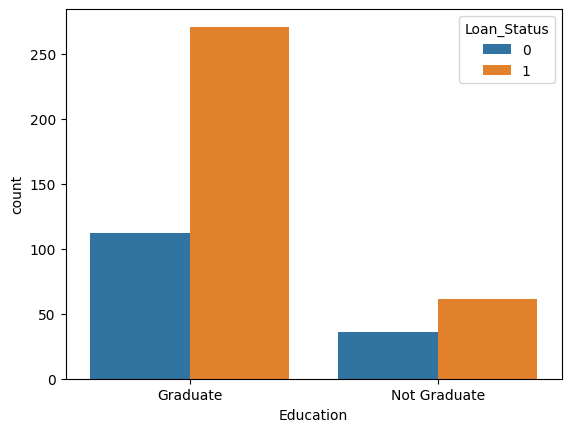

In [26]:
#### education and loan status

sns.countplot(loan_data,x='Education',hue='Loan_Status')

<AxesSubplot: xlabel='Married', ylabel='count'>

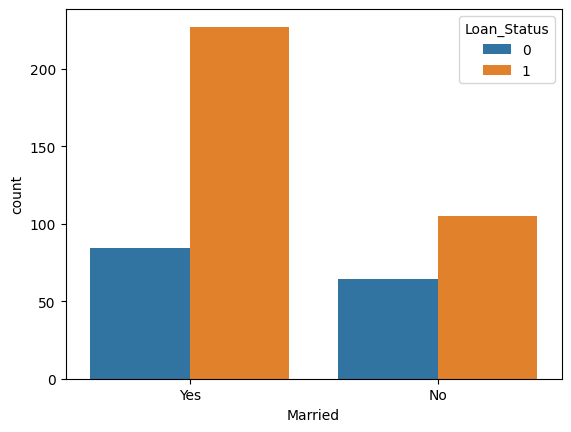

In [27]:
#### marital status and loan status

sns.countplot(loan_data,x='Married',hue='Loan_Status')

<AxesSubplot: xlabel='Gender', ylabel='count'>

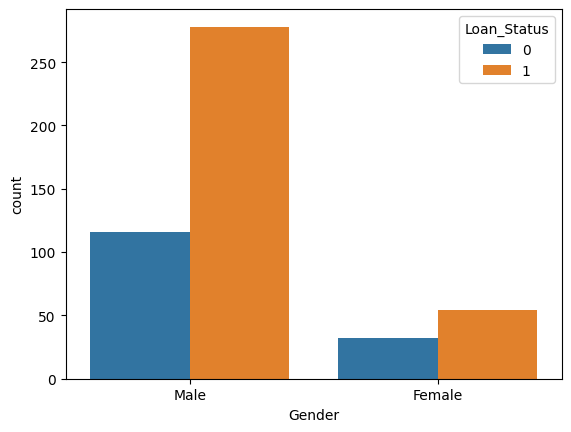

In [28]:
#### Gender and loan_status

sns.countplot(loan_data,x="Gender",hue="Loan_Status")

<AxesSubplot: xlabel='Dependents', ylabel='count'>

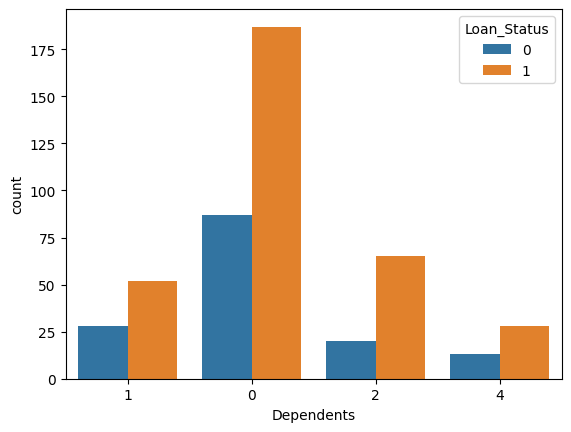

In [29]:
#### Dependent and loan_Status

sns.countplot(loan_data,x='Dependents',hue='Loan_Status')

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

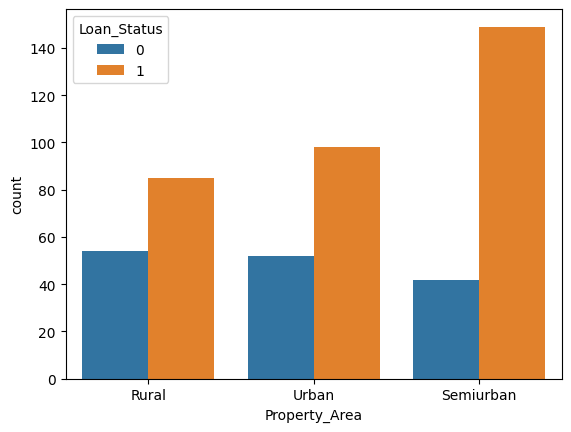

In [30]:
#### Property_Area and Loan_Status
sns.countplot(loan_data,x='Property_Area',hue='Loan_Status')

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

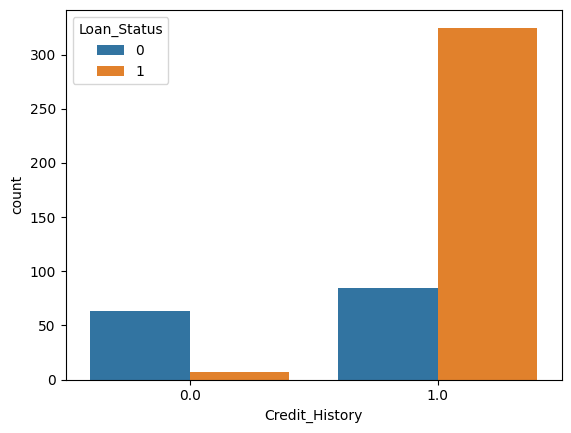

In [31]:
#### Credit_History and Loan_Status

sns.countplot(loan_data,x='Credit_History',hue='Loan_Status')

#### Now we are converting 'text or string' values into integer or 1,0 formate for our convenience 

In [42]:
loan_data=loan_data.replace({"Gender":{"Male":1,"Female":0},
                            "Married":{"Yes":1,"No":0},
                            "Education":{"Graduate":1,"Not Graduate":0},
                            "Self_Employed":{"Yes":1,"No":0},
                            "Property_Area":{"Rural":1,"Urban":0,"Semiurban":2}})

In [43]:
#### it's important to convert all the value into integer value

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


 ## Now separatting data and the label

In [49]:
loan_data=loan_data.drop(columns='Loan_ID',axis=1)
X=loan_data.iloc[:,:-1]
Y=loan_data.iloc[:,-1]

In [50]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [51]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

## Splitting the data into Training and Testing data

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2,stratify=Y)

In [57]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


## Training the Model

In [60]:
#### SVC is the support vector classification

classification=svm.SVC(kernel='linear')

In [62]:
classification.fit(X_train,Y_train)

SVC(kernel='linear')

## Prediction of Training data

In [63]:
prediction_training_data=classification.predict(X_train)
accuracy_training_data=accuracy_score(prediction_training_data,Y_train)

In [64]:
print(accuracy_training_data)

0.7786458333333334


## Prediction of Test data

In [65]:
prediction_test_data=classification.predict(X_test)
accuracy_test_data=accuracy_score(prediction_test_data,Y_test)

In [66]:
print(accuracy_test_data)

0.7916666666666666
